# Homework 6 - Fairness statistics

## Task 1
We have two populations Blue (privileged) and Red (unprivileged), with the Blue population being 9 times larger than the Red population.

Individuals from both populations are requesting to attend XAI training to improve competency in this important area. Number of places is limited. The administrators of the training have decided to give priority to enrolling individuals who may need this training in the future, although unfortunately it is difficult to predict who will benefit.

The decision rule adopted:
1. In the Red group, half of the people will find the skills useful in future and half will not. Administrators randomly allocate 50% of people to training.
2. in the Blue group, 80% of people will find the training useful in future and 20% will not, although of course it is not known who will find it useful. The administrators have built a predictive model based on user behaviour in predicting for whom it will be useful and whom will not. The model has the following performance:


| Blue                     	| Will use XAI 	| Will not use XAI 	| Total 	|
|--------------------------	|--------------	|------------------	|-------	|
| Enrolled in training     	| 60           	| 5               	| 65    	|
| not enrolled in training 	| 20            	| 15               	| 35    	|
| Total                    	| 80           	| 20               	| 100   	|


Task: Calculate the Demographic parity, equal opportunity and predictive rate parity coefficients for this decision rule.

Starred task: How can this decision rule be changed to improve its fairness?



1.   Demgraphic parity: $$\frac{P(\hat{Y}|A=Blue)}{P(\hat{Y}|A=Red)} = \frac{0.65}{0.5}=1.3$$ So there is no demographic parity and the imparity violates the four-fifth rule.
2.   Equal opportunity: $$\frac{P(\hat{Y}|A=Blue, Y=1)}{P(\hat{Y}|A=Red, Y=1)} = \frac{60/(60+20)}{0.5} = 1.5$$ The people from blue group that find XAI skills useful have much bigger chance of being enrolled in the training.
3.   Predictive rate parity: $$\frac{P(Y|A=Blue, \hat{Y}=1)}{P(Y|A=Red, \hat{Y}=1)} = \frac{60/65}{0.5} = \frac{120}{65} \approx 1,846$$

#### *How can this decision rule be changed to improve its fairness?

The fairness could be improved by simply allowing less people from the Blue group to enroll for the course - right now they are privileged comparing to Red.



## Task 2

For this homework, train models on one of the following datasets:

- credit scoring https://www.kaggle.com/datasets/brycecf/give-me-some-credit-dataset (https://www.kaggle.com/competitions/GiveMeSomeCredit/)
- adult income https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Prepare a knitr/jupiter notebook with the following points.
Submit your results on GitHub to the directory `Homeworks/HW6`.

1. Train a model for the selected dataset.
2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.
3. Train another model (different hyperparameters, feature transformations etc.) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it.
4. Apply the selected bias mitigation technique on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this correction.
5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation?
6. ! COMMENT on the results obtained in (2)-(5)

# 2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.

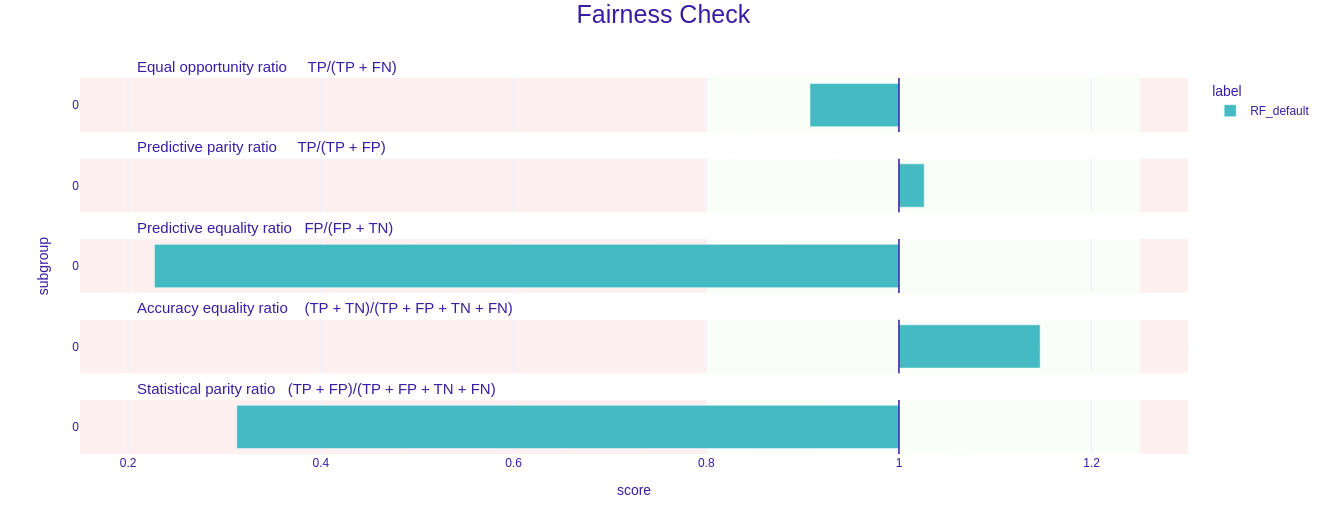

In [ ]:
# Fairness coefficients for the base model:

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV       FPR       STP
0  0.907668  1.146552  1.026243  0.227273  0.312727


According to four-fifth rule, our model is not biased in terms of equal opportunity: $0.908$ and predictive parity: $1.026$, **but** it is heavily biased in terms of statistical parity: $0.313$. 

This basically means that the model is about 3 times more likely to predict the positive label for men (label `1`) than for women (label `0`). 




# 3. Train another model (different hyperparameters, feature transformations etc.) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it.

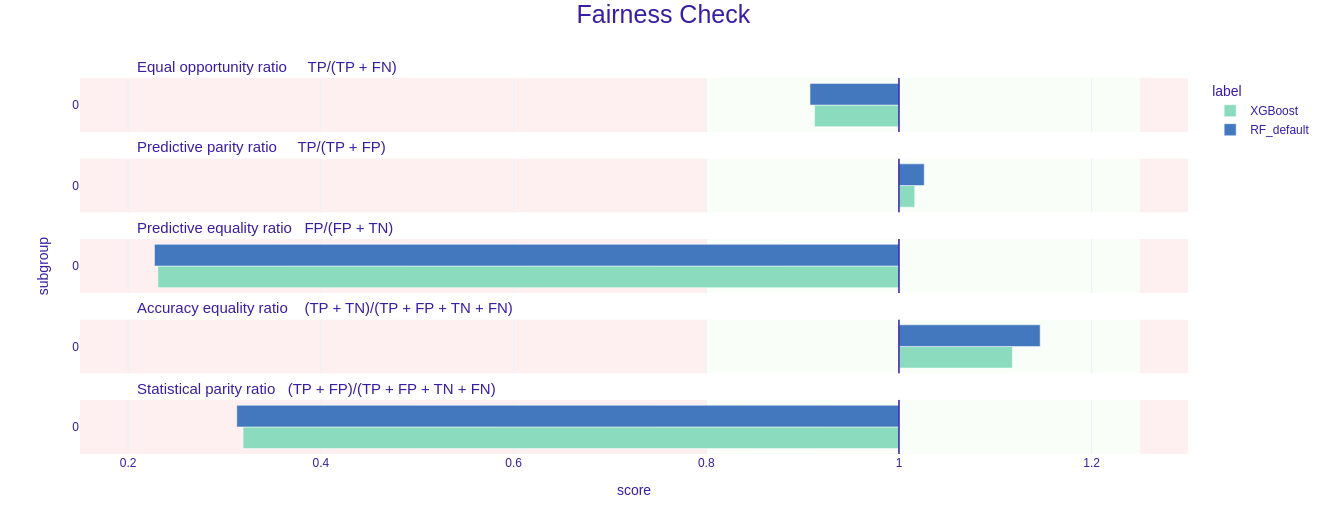

In [ ]:
# Fairness coefficients for the better performing model:

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV       FPR       STP
0  0.912387  1.117717  1.016393  0.230769  0.319231


We trained a better model (XGBoost) that improved accuracy and F1 metrics by around 3%, comparing to the baseline random forest.

It turns out that the better performing model is only slightly better in terms of fairness metrics, and in the metric that hurts us the most (STP) the difference is small ($0.319$ vs. $0.313$). 

# 4. Apply the selected bias mitigation technique on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this correction.

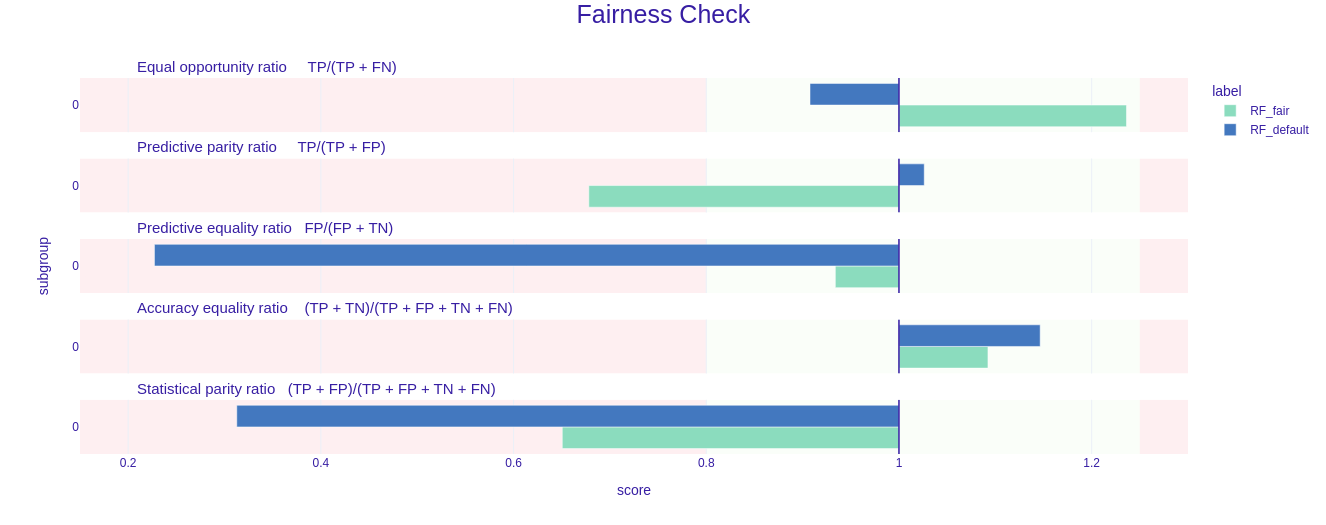

In [ ]:
more_fair_explainer.model_fairness(protected=protected_var, privileged=1).fairness_check()

Bias detected in 2 metrics: PPV, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV       FPR       STP
0  1.236133  1.092365  0.678082  0.933962  0.650558


We made the model more fair wrt. gender by modifying prediction threshold for the non-privileged class from 0.5 to 0.2 (model post-processing technique). We left the threshold the same for the privileged class. 

In this way we managed to improve model fairness a lot in terms of statistical parity (0.31 -> 0.65) and predictive equality (0.23 -> 0.93) ratios. This came at a cost - we made the model slightly more unfair on equal opportunity and predictive parity, but they either do not or only slightly violate the four-fifth rule. 

# 5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation?

In [ ]:
# Original model

Preparation of a new explainer is initiated

  -> data              : 14924 rows 96 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14924 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF_default
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7fde60b898b0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.25, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00251, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
RF_default,0.630282,0.72628,0.674884,0.849772,0.901588


In [ ]:
# Better performing model (XGBoost)

Preparation of a new explainer is initiated

  -> data              : 14924 rows 96 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14924 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7fde60b898b0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 3.63e-05, mean = 0.248, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.985, mean = -0.000169, max = 0.999
  -> model_info        : package xgboost

A new explainer has been created!


,recall,precision,f1,accuracy,auc
XGBoost,0.653575,0.794273,0.717088,0.87242,0.92962


In [ ]:
# Fixed original model (after bias mitigation)

,recall,precision,f1,accuracy,auc
RF_fair,0.652221,0.674699,0.66327,0.83617,0.774428


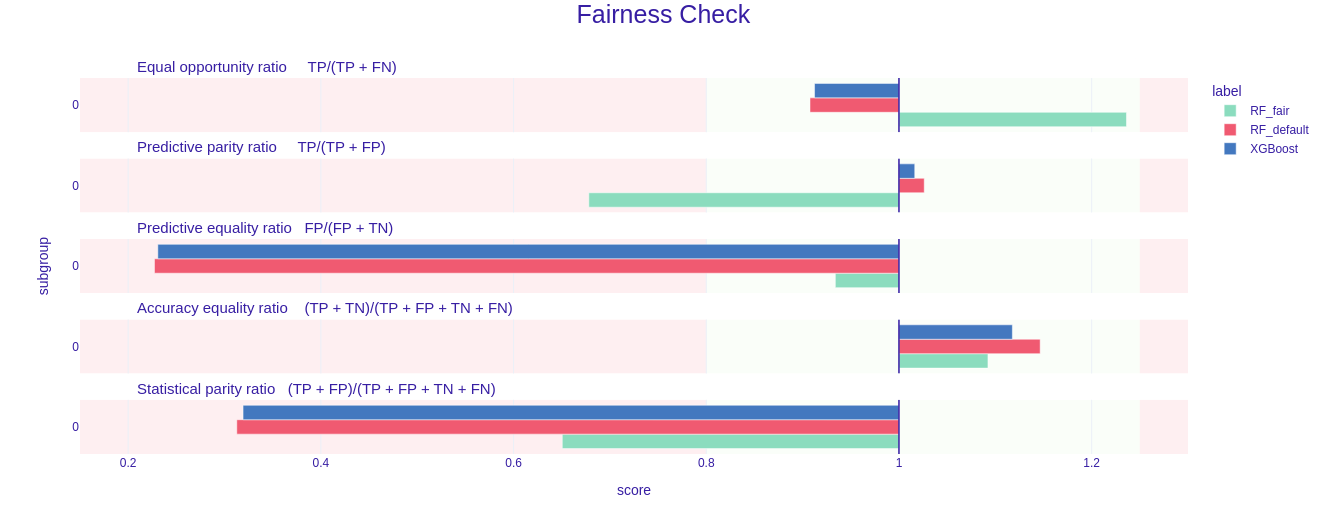

Two unmodified models (`RF_default` and `XGBoost`) perform very similarly in terms of fairness. The model with bias mitigation (`RF_fair`) has much less extreme fairness coefficients. 

The `RF_fair` model is the worse in terms of metrics performance (83.6% vs. 85% accuracy, 66% vs. 67% F1). But the loss in performance isn't huge, comparing that the model after mitigation is now much more fair.

I think one sometimes needs to trade-off model performance for fairness, especially in cases where bias is hidden more in the training data than the model itself, and we evaluate model performance on an i.i.d split of the training data which exhibits the same biases. 

# Appendix

# 0. Data loading and preprocessing

In [2]:
!gdown 1WH3tzwezG_O_YIQG__MTCHh65lOwY4XY

Downloading...
From: https://drive.google.com/uc?id=1WH3tzwezG_O_YIQG__MTCHh65lOwY4XY
To: /content/adult.csv
100% 5.33M/5.33M [00:00<00:00, 155MB/s]


In [3]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=b161ea3fc1c5258b209a9f4d544307c252184ab814e150bda6447dd04f497a22
  Stored in directory: /root/.cache/pip/wheels/b1/02/58/77ac4cb307fec9f3324c6aa4f9f23a7b0e886e313ebc280257
Successfully built dalex


In [34]:
import dalex as dx
import xgboost

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import platform
print(f'Python {platform.python_version()}')

{package.__name__: package.__version__ for package in [dx, xgboost, sklearn, pd, np]}

Python 3.8.15


{'dalex': '1.5.0',
 'xgboost': '0.90',
 'sklearn': '1.0.2',
 'pandas': '1.3.5',
 'numpy': '1.21.6'}

In [75]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df = df[~df.isin(['?']).any(axis=1)]
df.loc[:, df.dtypes == 'object'] =\
    df.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

X = df.drop(columns='income')
X =  pd.get_dummies(X, columns=X.select_dtypes(['category']).columns, drop_first=True) 
y = df.income == ">50K"

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

# 1. Train a model for the selected dataset.

In [78]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [79]:
def pf_xgboost_classifier_categorical(model, df):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))
    return model.predict_proba(df)[:, 1]

explainer = dx.Explainer(model, X_test, y_test, predict_function=pf_xgboost_classifier_categorical, label="RF_default")
explainer.model_performance()

Preparation of a new explainer is initiated

  -> data              : 14924 rows 96 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14924 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF_default
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7fde60b898b0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.25, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00251, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
RF_default,0.630282,0.72628,0.674884,0.849772,0.901588


We trained a random forest model with default hyperparameters. The metrics look reasonable.

# 2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.

In [83]:
protected_var = X_test.gender_Male
privileged_group = 1

fobj = explainer.model_fairness(protected=protected_var, privileged=1)

In [84]:
fobj.plot()

In [86]:
fobj.metric_scores

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
0,0.580,0.975,0.743,0.949,0.420,0.025,0.257,0.051,0.931,0.086
1,0.639,0.890,0.724,0.845,0.361,0.110,0.276,0.155,0.812,0.275


In [85]:
fobj.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV       FPR       STP
0  0.907668  1.146552  1.026243  0.227273  0.312727


According to four-fifth rule, our model is not biased in terms of equal opportunity: $0.908$ and predictive parity: $1.026$, **but** it is heavily biased in terms of statistical parity: $0.313$. 

This basically means that the model is about 3 times more likely to predict the positive label for men (label `1`) than for women (label `0`). 




# 3. Train another model (different hyperparameters, feature transformations etc.) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it.

In [113]:
xgb_model = xgboost.XGBClassifier(
    n_estimators=200, 
    max_depth=5, 
    colsample_bytree=0.5,
    use_label_encoder=False, 
    eval_metric="logloss",
    # colsample_bytr
    enable_categorical=True,
    tree_method="hist",
)
xgb_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, enable_categorical=True,
              eval_metric='logloss', max_depth=5, n_estimators=200,
              tree_method='hist', use_label_encoder=False)

In [114]:
xgb_explainer = dx.Explainer(xgb_model, X_test, y_test, predict_function=pf_xgboost_classifier_categorical, label="XGBoost")
xgb_explainer.model_performance()

Preparation of a new explainer is initiated

  -> data              : 14924 rows 96 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14924 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7fde60b898b0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 3.63e-05, mean = 0.248, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.985, mean = -0.000169, max = 0.999
  -> model_info        : package xgboost

A new explainer has been created!


,recall,precision,f1,accuracy,auc
XGBoost,0.653575,0.794273,0.717088,0.87242,0.92962


In [117]:
fobj_xgb = xgb_explainer.model_fairness(protected=protected_var, privileged=1)
fobj_xgb.plot(objects=fobj)

In [118]:
fobj_xgb.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV       FPR       STP
0  0.912387  1.117717  1.016393  0.230769  0.319231


We trained a better model (XGBoost) that improved accuracy and F1 metrics by around 3%, comparing to the baseline random forest.

It turns out that the better performing model is only slightly better in terms of fairness metrics, and in the metric that hurts us the most (STP) the difference is small ($0.319$ vs. $0.313$). 

# 4. Apply the selected bias mitigation technique on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this correction.

In [187]:
from functools import partial

def fair_predict_fn(model, df, protected_var, privileged_val):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))

    probs = model.predict_proba(df)[:, 1]

    not_privileged = df[protected_var] != privileged_val
    preds = np.where(not_privileged, probs > 0.2, probs > 0.5)

    return preds.astype(np.int32)

fair_predict_fn = partial(fair_predict_fn, 
                          protected_var="gender_Male",
                          privileged_val=1)

more_fair_explainer = dx.Explainer(model, X_test, y_test, predict_function=fair_predict_fn, label="RF_fair")

Preparation of a new explainer is initiated

  -> data              : 14924 rows 96 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14924 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF_fair
  -> predict function  : functools.partial(<function fair_predict_fn at 0x7fde5df55c10>, protected_var='gender_Male', privileged_val=1) will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.239, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.00824, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [188]:
more_fair_explainer.model_performance()

,recall,precision,f1,accuracy,auc
RF_fair,0.652221,0.674699,0.66327,0.83617,0.774428


In [190]:
more_fair_explainer.model_fairness(protected=protected_var, privileged=1).plot(objects=fobj)

In [192]:
more_fair_explainer.model_fairness(protected=protected_var, privileged=1).fairness_check()

Bias detected in 2 metrics: PPV, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV       FPR       STP
0  1.236133  1.092365  0.678082  0.933962  0.650558


We made the model more fair wrt. gender by modifying prediction threshold for the non-privileged class from 0.5 to 0.2 (model post-processing technique). We left the threshold the same for the privileged class. 

In this way we managed to improve model fairness a lot in terms of statistical parity (0.31 -> 0.65) and predictive equality (0.23 -> 0.93) ratios. This came at a cost - we made the model slightly more unfair on equal opportunity and predictive parity, but they either do not or only slightly violate the four-fifth rule. 

# 5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation?

In [ ]:
# Original model

Preparation of a new explainer is initiated

  -> data              : 14924 rows 96 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14924 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF_default
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7fde60b898b0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.25, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00251, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
RF_default,0.630282,0.72628,0.674884,0.849772,0.901588


In [ ]:
# Better performing model (XGBoost)

Preparation of a new explainer is initiated

  -> data              : 14924 rows 96 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14924 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7fde60b898b0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 3.63e-05, mean = 0.248, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.985, mean = -0.000169, max = 0.999
  -> model_info        : package xgboost

A new explainer has been created!


,recall,precision,f1,accuracy,auc
XGBoost,0.653575,0.794273,0.717088,0.87242,0.92962


In [ ]:
# Fixed original model (after bias mitigation)

,recall,precision,f1,accuracy,auc
RF_fair,0.652221,0.674699,0.66327,0.83617,0.774428


In [193]:
more_fair_explainer.model_fairness(protected=protected_var, privileged=1).plot(objects=[fobj,fobj_xgb])

Two unmodified models (`RF_default` and `XGBoost`) perform very similarly in terms of fairness. The model with bias mitigation (`RF_fair`) has much less extreme fairness coefficients. 

The `RF_fair` model is the worse in terms of metrics performance (83.6% vs. 85% accuracy, 66% vs. 67% F1). But the loss in performance isn't huge, comparing that the model after mitigation is now much more fair.

I think one sometimes needs to trade-off model performance for fairness, especially in cases where bias is hidden more in the training data than the model itself, and we evaluate model performance on an i.i.d split of the training data which exhibits the same biases. 

In [ ]:
!jupyter nbconvert --to=html xai_hw6_st.ipynb